In [150]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [151]:
city_df = pd.read_csv("../Resources/city_data.csv")
ride_df = pd.read_csv("../Resources/ride_data.csv")
#Merge original data
city_ride_df = ride_df.merge(city_df, how='outer', on='city')

In [160]:
#Make frames of the needed data

#Frame of average fare per city
avg_fare_per_city = city_ride_df.groupby(['type', 'city'])['fare'].mean().reset_index()
avg_fare_per_city.set_index('city', inplace=True)
avg_fare_per_city.rename(columns={'fare': 'Average fare ($)'}, inplace=True)
avg_fare_per_city.drop(columns='type', inplace=True)

#Frame of total rides per city
total_rides_per_city = city_ride_df.groupby(['type', 'city'])['ride_id'].count().reset_index()
total_rides_per_city.set_index('city', inplace=True)
total_rides_per_city.rename(columns={'ride_id': 'Total Number of Rides (Per City)'}, inplace=True)
total_rides_per_city.drop(columns='type', inplace=True)

#Frame of driver count per city
driver_count_per_city = city_ride_df.groupby(['type', 'city'])['driver_count'].min().reset_index()
driver_count_per_city.set_index('city', inplace=True)
driver_count_per_city.rename(columns={'driver_count': 'driver count'}, inplace=True)

#Merge stats we need into one frame
city_ride_merged = driver_count_per_city.merge(total_rides_per_city, on='city').merge(avg_fare_per_city, on='city')
city_ride_merged.reset_index()

#separate by city type so they can be plotted easily
urban_df = city_ride_merged[city_ride_merged.type == 'Urban']
suburban_df = city_ride_merged[city_ride_merged.type == 'Suburban']
rural_df = city_ride_merged[city_ride_merged.type == 'Rural']

##  Bubble Plot of Ride Sharing Data

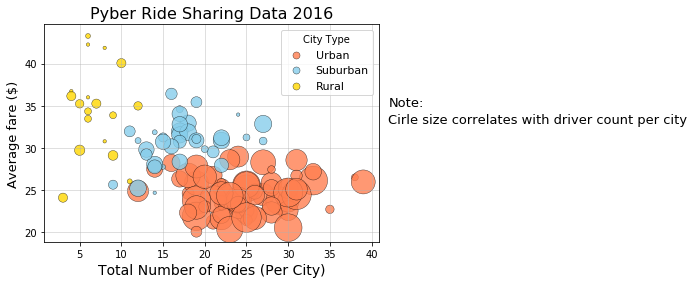

In [161]:
#Plot our frames to a bubble chart
urban_plot = plt.scatter(urban_df['Total Number of Rides (Per City)'], urban_df['Average fare ($)'], s=urban_df['driver count']*12, \
            marker='o', color='Coral', linewidths=0.4, edgecolors='black', alpha=0.8, label='Urban')

suburban_plot = plt.scatter(suburban_df['Total Number of Rides (Per City)'], suburban_df['Average fare ($)'], s=suburban_df['driver count']*12, \
            marker='o', color='SkyBlue', linewidths=0.4, edgecolors='black',alpha=0.8, label='Suburban')

rural_plot = plt.scatter(rural_df['Total Number of Rides (Per City)'], rural_df['Average fare ($)'], s=rural_df['driver count']*12, \
            marker='o', color='Gold', linewidths=0.4, edgecolors='black',alpha=0.8, label='Rural')

plt.title('Pyber Ride Sharing Data 2016', fontsize=16)
plt.xlabel('Total Number of Rides (Per City)', fontsize=14)
plt.ylabel('Average fare ($)', fontsize=13)
lgd = plt.legend(handles=[urban_plot, suburban_plot, rural_plot], loc="best", title='City Type', fontsize=11)
lgd.legendHandles[0]._sizes = [50]
lgd.legendHandles[1]._sizes = [50]
lgd.legendHandles[2]._sizes = [50]
plt.text(42, 35, 'Note:', fontsize=13)
plt.text(42, 33, 'Cirle size correlates with driver count per city', fontsize=13)
plt.grid(alpha=0.5)

plt.savefig('Pyber_bubble_chart.jpeg', bbox_inches='tight')
plt.show()

##  Total Fares by City Type

In [154]:
#Calculate total fares per city type for our py...excuse me, pie chart
total_fare_per_city = round(city_ride_df.groupby('type')['fare'].sum()).reset_index()

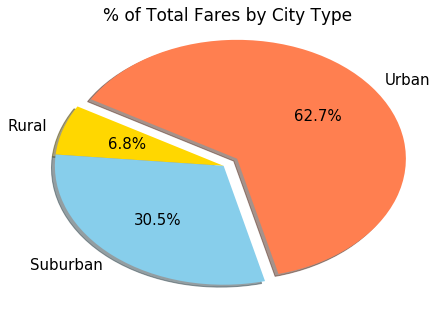

In [162]:
#Build pie chart, save figure and show it. Charting with the pandas method won't let me get rid of the legend.

plt.figure(figsize=(7, 5))
city_fares = plt.pie(total_fare_per_city['fare'], labels=total_fare_per_city['type'], colors=['Gold','SkyBlue','Coral'], \
        startangle=150, shadow=True, autopct="%1.1f%%",explode=(0,0,0.1,), textprops={'fontsize': 15})

plt.title('% of Total Fares by City Type ', fontsize=17)
plt.axis('auto')
plt.savefig('percentage_of_total_fares_by_city_type.jpeg')
plt.show()

In [167]:
##Calculate total rides per city type for the next pie chart
total_rides_per_city = round(city_ride_merged.groupby('type')['Total Number of Rides (Per City)'].sum()).reset_index()

##  Total Rides by City Type

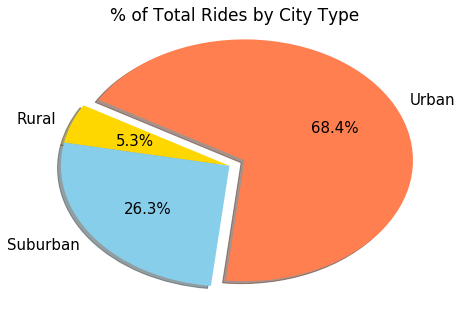

In [166]:
#Build pie chart, save figure and show it.
plt.figure(figsize=(7, 5))
plt.pie(total_rides_per_city['Total Number of Rides (Per City)'], labels=total_rides_per_city['type'], colors=['Gold','SkyBlue','Coral'], \
        startangle=150, shadow=True, autopct="%1.1f%%",explode=(0,0,0.1), textprops={'fontsize': 15})

plt.title('% of Total Rides by City Type ', fontsize=17)
plt.axis('auto')
plt.savefig('percentage_of_total_rides_by_city_type.jpeg')
plt.show()

In [168]:
##Calculate total drivers per city type for the next pie chart
total_drivers_per_city = round(city_ride_merged.groupby('type')['driver count'].sum()).reset_index()

## ##  Total Drivers by City Type

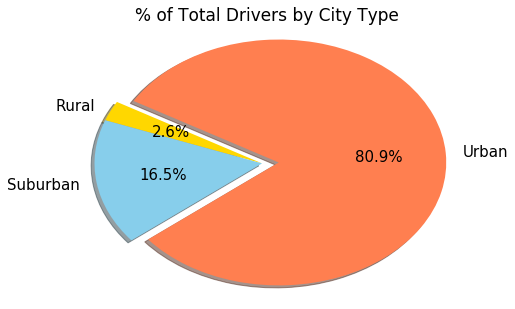

In [169]:
#Build pie chart, save figure and show it.
plt.figure(figsize=(7, 5))
plt.pie(total_drivers_per_city['driver count'], labels=total_rides_per_city['type'], colors=['Gold','SkyBlue','Coral'], \
        startangle=150, shadow=True, autopct="%1.1f%%",explode=(0,0,0.1,), textprops={'fontsize': 15})

plt.title('% of Total Drivers by City Type ', fontsize=17)
plt.axis('auto')
plt.savefig('percentage_of_total_drivers_by_city_type.jpeg')
plt.show()

### Notes: 3 observable trends
>- The drivers in urban cities noticeably get lower fares on average but they pick up more passengers and they also have
   more drivers to contend with for pickups.<br>
<br>
>- Drivers in rural cities generally get much higher fares and have less drivers to contend with but there aren't very
   many rides to pick up.<br>
<br>
>- I would say it's safe to conclude that in general, drivers are more profitable that drive in urban cities over both rural
   and suburban cities.
